In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.fc = nn.Linear(32 * 28 * 28, 10)

    def forward(self, x):
        x = self.conv(x)
        x = x.view(-1, 32 * 28 * 28)
        x = self.fc(x)
        return x

# Initialize model, loss, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Generate some dummy data
inputs = torch.randn(1, 1, 28, 28)
targets = torch.tensor([3])

# Print initial kernel values
print("Initial kernel values:")
print(model.conv.weight.data[0, 0])

# Training loop (one iteration for demonstration)
optimizer.zero_grad()
outputs = model(inputs)
loss = criterion(outputs, targets)
loss.backward()
optimizer.step()

# Print updated kernel values
print("\nUpdated kernel values:")
print(model.conv.weight.data[0, 0])

Initial kernel values:
tensor([[-0.3214, -0.2632, -0.0139],
        [ 0.3307,  0.2170,  0.0129],
        [ 0.2769, -0.0372,  0.0492]])

Updated kernel values:
tensor([[-0.3239, -0.2635, -0.0139],
        [ 0.3319,  0.2175,  0.0117],
        [ 0.2791, -0.0365,  0.0493]])


CNN Kernel Update Example

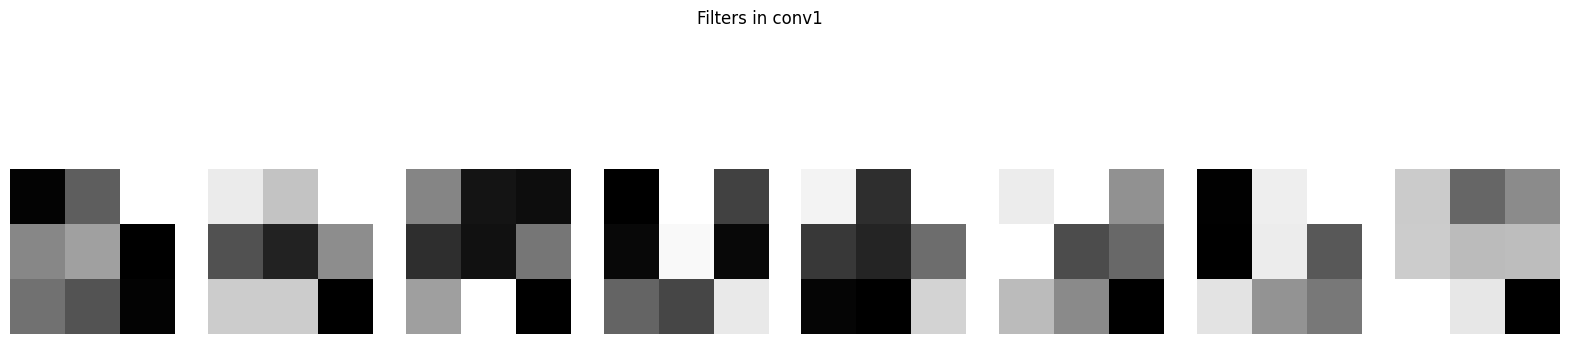

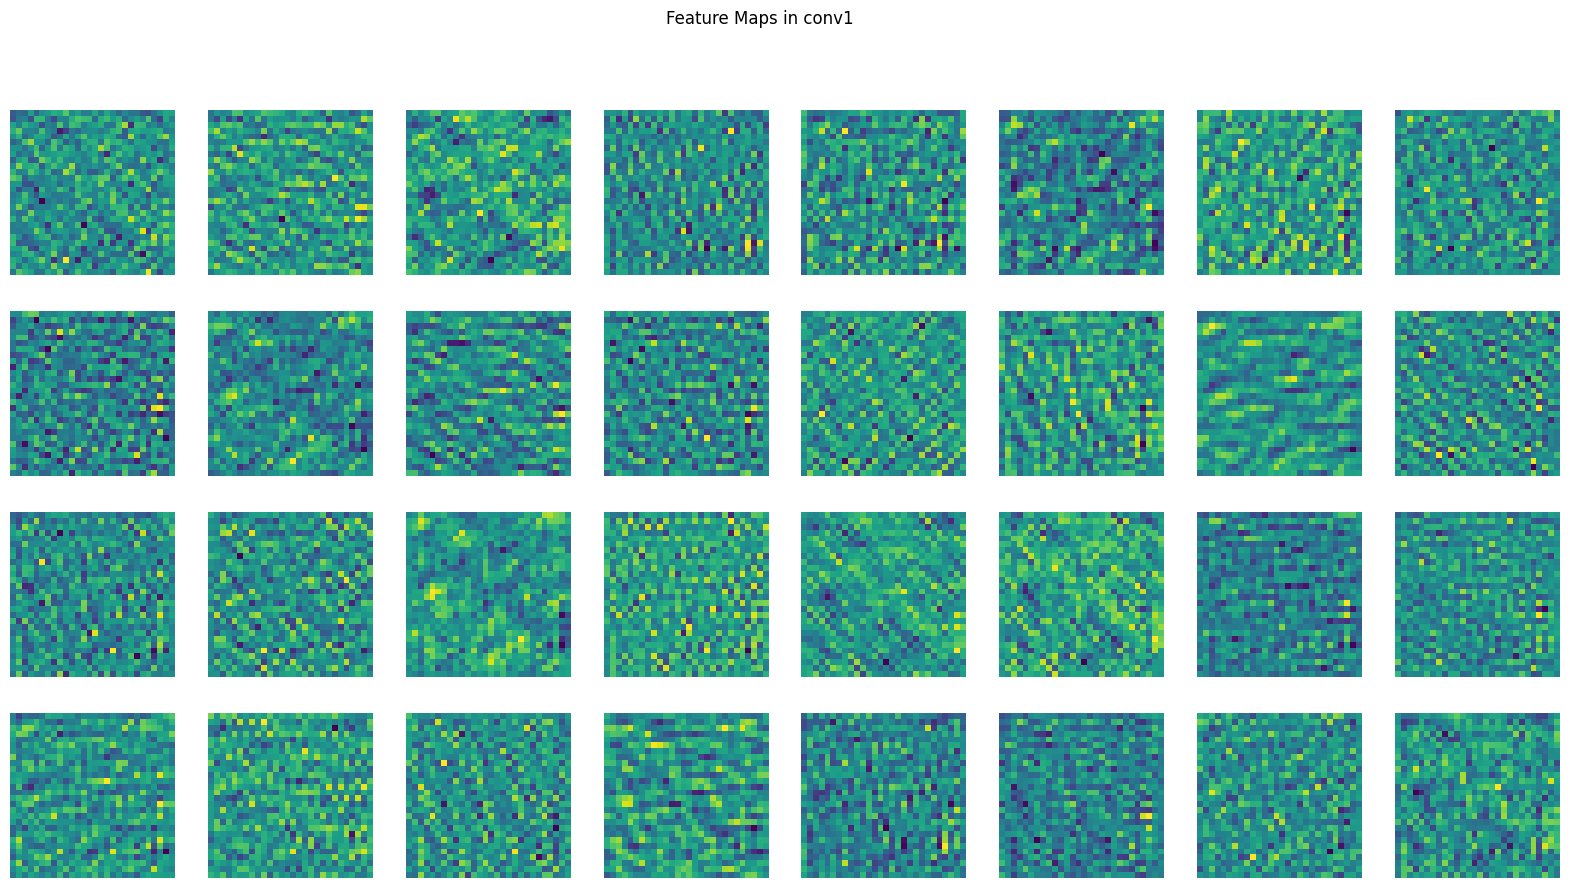

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(64 * 7 * 7, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.fc(x)
        return x

# Initialize the model
model = SimpleCNN()

# Function to visualize filters
def visualize_filters(model, layer_name, num_filters=8):
    for name, module in model.named_modules():
        if name == layer_name:
            filters = module.weight.data.numpy()
            fig, axs = plt.subplots(1, num_filters, figsize=(20, 5))
            for i in range(num_filters):
                axs[i].imshow(filters[i, 0], cmap='gray')
                axs[i].axis('off')
            plt.suptitle(f'Filters in {layer_name}')
            plt.show()

# Function to visualize feature maps
def visualize_feature_maps(model, input_image, layer_name):
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook

    for name, module in model.named_modules():
        if name == layer_name:
            module.register_forward_hook(get_activation(layer_name))

    model.eval()
    with torch.no_grad():
        output = model(input_image)

    act = activation[layer_name].squeeze().numpy()
    fig, axs = plt.subplots(4, 8, figsize=(20, 10))
    for i in range(32):
        row = i // 8
        col = i % 8
        axs[row, col].imshow(act[i], cmap='viridis')
        axs[row, col].axis('off')
    plt.suptitle(f'Feature Maps in {layer_name}')
    plt.show()

# Generate a sample input
sample_input = torch.randn(1, 1, 28, 28)

# Visualize filters
visualize_filters(model, 'conv1')

# Visualize feature maps
visualize_feature_maps(model, sample_input, 'conv1')